##**Q1. Problem Statement:Chi-Square Test**

The “titanic.csv”dataset hasdetails of passengers on board the Titanic when it met  its  fate  in  1912. Your  job  is  tocompare  how  Passenger  class  affects  the probability of survival withthe help ofthe Chi-Square test.Load the“titanic.csv“ data into a DataFrame and perform the following tasks:

1.Create   a   DataFrame   with   three   columns   from   the   original   dataset –"PassengerID," "PClass," "Survived or not"

2.Visualize the "PClass"and the "Survived or not"columns to get an overview of the columns

3.Plotthe correlation  between  passenger  class  and  chances  of  survival  and calculatethe survival rate for each class

4.State Null hypothesis based on the class-wise survival rate

5.Plot  the  difference  between  expected  and  observed  correlations  between passenger class and survival using heat maps to decide if there is a need for a Chi-Square Test

6.Calculate Chi-Square and P –Values for each passenger class and the entire distribution

7.Accept or reject the Null hypothesis based on the results obtained

In [97]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats.distributions import chi2
from scipy import stats


df = pd.read_csv("/content/sample_data/titanic_dataset.csv",index_col = "PassengerId", usecols = ["PassengerId","Survived","Pclass"])



,Survived,Pclass
PassengerId,,
1,0,3
2,1,1
3,1,3
4,1,1
5,0,3


#**STEP1**
Create a DataFrame with three columns from the original dataset –"PassengerID," "PClass," "Survived or not"



In [ ]:
df.head()

In [63]:
df.info()
df.Survived

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Survived  891 non-null    int64
 1   Pclass    891 non-null    int64
dtypes: int64(2)
memory usage: 53.2 KB


PassengerId
1      0
2      1
3      1
4      1
5      0
      ..
887    0
888    1
889    0
890    1
891    0
Name: Survived, Length: 891, dtype: int64

#**STEP2**
Visualize the "PClass"and the "Survived or not"columns to get an overview of the columns

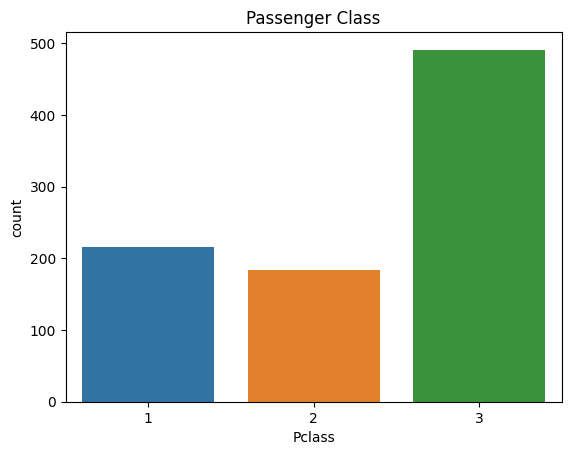

In [64]:
sns.countplot(df, x = "Pclass")
plt.title("Passenger Class")
plt.show()

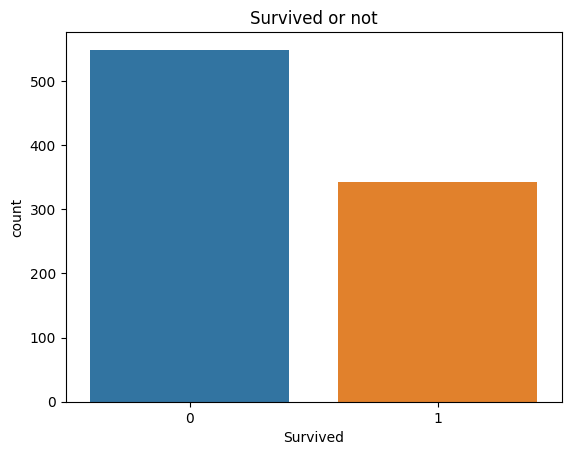

In [66]:
sns.countplot(df,x = "Survived")
plt.title("Survived or not")
plt.show()

#**STEP3**
Plot the correlation between passenger class and chances of survival and calculatethe survival rate for each class


In [67]:
PassengerClass_Survived = pd.pivot_table(df,index=['Pclass'],columns=['Survived'],aggfunc='size')
print(PassengerClass_Survived)

Survived    0    1
Pclass            
1          80  136
2          97   87
3         372  119


#**STEP4**
State Null hypothesis based on the class-wise survival rate




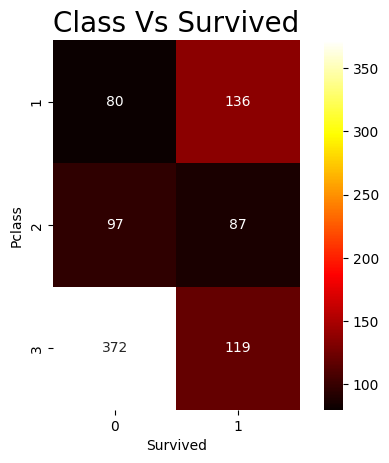

In [68]:
sns.heatmap(PassengerClass_Survived,annot=True, fmt='g',square=True,cmap='hot')
plt.title('Class Vs Survived',fontsize=20)
plt.show()

In [69]:
pct_Class = PassengerClass_Survived.sum(axis=1)/891
pct_Class

Pclass
1    0.242424
2    0.206510
3    0.551066
dtype: float64

In [70]:
pct_Survived = PassengerClass_Survived.sum(axis=0)/891
pct_Survived

Survived
0    0.616162
1    0.383838
dtype: float64

In [71]:
pct_Class.to_frame()@(pct_Survived.to_frame().T)

Survived,0,1
Pclass,,
1,0.149373,0.093052
2,0.127243,0.079266
3,0.339546,0.211520


In [74]:
expected = round(pct_Class.to_frame()@(pct_Survived.to_frame().T)*891)
expected

Survived,0,1
Pclass,,
1,133.0,83.0
2,113.0,71.0
3,303.0,188.0


#**STEP5**
Plot the difference between expected and observed correlations between passenger class and survival using heat maps to decide if there is a need for a Chi-Square Test


<Figure size 1000x400 with 0 Axes>

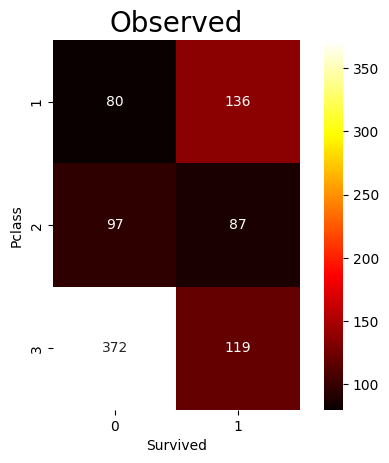

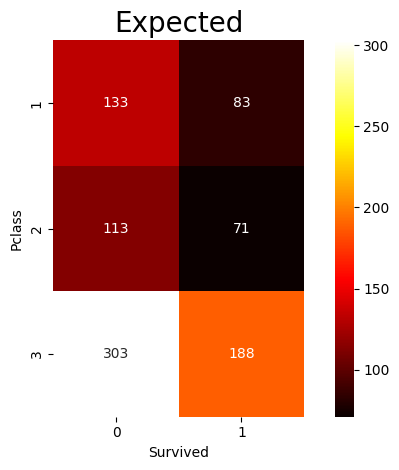

In [89]:
plt.figure(figsize=(10,4))
plt.subplots(1,1)
sns.heatmap(PassengerClass_Survived,annot=True, fmt='g',square=True,cmap='hot')
plt.title('Observed',fontsize=20)
plt.subplots(1,1)
sns.heatmap(expected,annot=True, fmt='g',square=True,cmap='hot')
plt.title('Expected',fontsize=20)
plt.tight_layout()
plt.show()

#**STEP6**
Calculate Chi-Square and P –Values for each passenger class and the entire distribution


In [95]:
Chi_table = ((PassengerClass_Survived - expected)**2)/expected
print(Chi_table,"\n")

Chi_value = Chi_table.sum().sum()
p_value = chi2.sf(Chi_value,1)
print("Chi square value is ",Chi_value)
print("P value is",p_value)

Survived          0          1
Pclass                        
1         21.120301  33.843373
2          2.265487   3.605634
3         15.712871  25.324468 

Chi square value is  101.87213414657131
P value is 5.9223796800860216e-24


#**STEP7**
Accept or reject the Null hypothesis based on the results obtained

In [98]:
chi2_stat, p_val, dof, ex = stats.chi2_contingency(PassengerClass_Survived)
print("Chi square value is ",chi2_stat)
print("P value is",p_val)
print("Degrees of Freedom:",dof)

Chi square value is  102.88898875696056
P value is 4.549251711298793e-23
Degrees of Freedom: 2
